# 第5章 机器学习的基本思想

## 习题1
机器学习的基本假设是： 
  
&emsp; A. 在训练和测试数据中存在相同的模式。  
&emsp; B. 训练数据和测试数据数量相同。   
&emsp; C. 测试数据是训练数据的一部分。   
&emsp; D. 训练数据的量足够多，可以训练出好的模型。



**解答**

&emsp;&emsp;**答案：A**  
    
&emsp;&emsp;A. 正确；机器学习的基本假设就是，在训练和测试数据中存在相同的模式。通俗的说，通过学习1+1=2，我们才能在同样的等式上进行推导(例如：2+2=4)  
&emsp;&emsp;B. 错误；训练数据(训练集)通常要比测试数据(测试集)多一些。训练集要多，模型才能从数据中学习到规律(也就是我们常说的泛化性会更好)；   
&emsp;&emsp;C. 错误；测试数据必须是全新并且未知的，否则模型都见过了再拿给它测试不就只是背答案了吗。  
&emsp;&emsp;D. 错误；训练数据并不是量足够大就能堆出好模型。相反的，如果使用的数据一点规律或者特征都无法显现出来。那模型并不会比使用了少量并且精准的数据集训练的效果好。

## 习题2
下列说法正确的是：   
&emsp; A. 为了防止过拟合，正则化系数越大越好。   
&emsp; B. 为了防止过拟合，应当选择尽可能简单的模型。   
&emsp; C. 交叉验证方法中虽然所有数据都被用到，但是不存在信息泄露。   
&emsp; D. 正则化系数$\lambda$可以通过令损失函数对$\lambda$的梯度为零计算出来。  

**解答**

&emsp;&emsp;**答案：B、C (题目不一定是单选题)；**  
&emsp;&emsp;A. 错误；正则化系数通常为较小的值。正则化系数越大，就越容易导致惩罚过大，从而导致模型欠拟合(哪有什么越xx越好，适合的才是最好~)  
&emsp;&emsp;B. 正确；尽可能简单的模型可以更好的防止过拟合。如果越复杂的模型，在相同体量下的数据集会疯狂学习，直到后面开始死记硬背而不是进行推理。(就像你有的大脑如果拥有超快的记忆能力和无限
内存，你还会推导吗？还是只是死记硬背答案？)所以模型以恰到好处的简单为宜，以下这张图简单展示了模型复杂度与误差的关系。
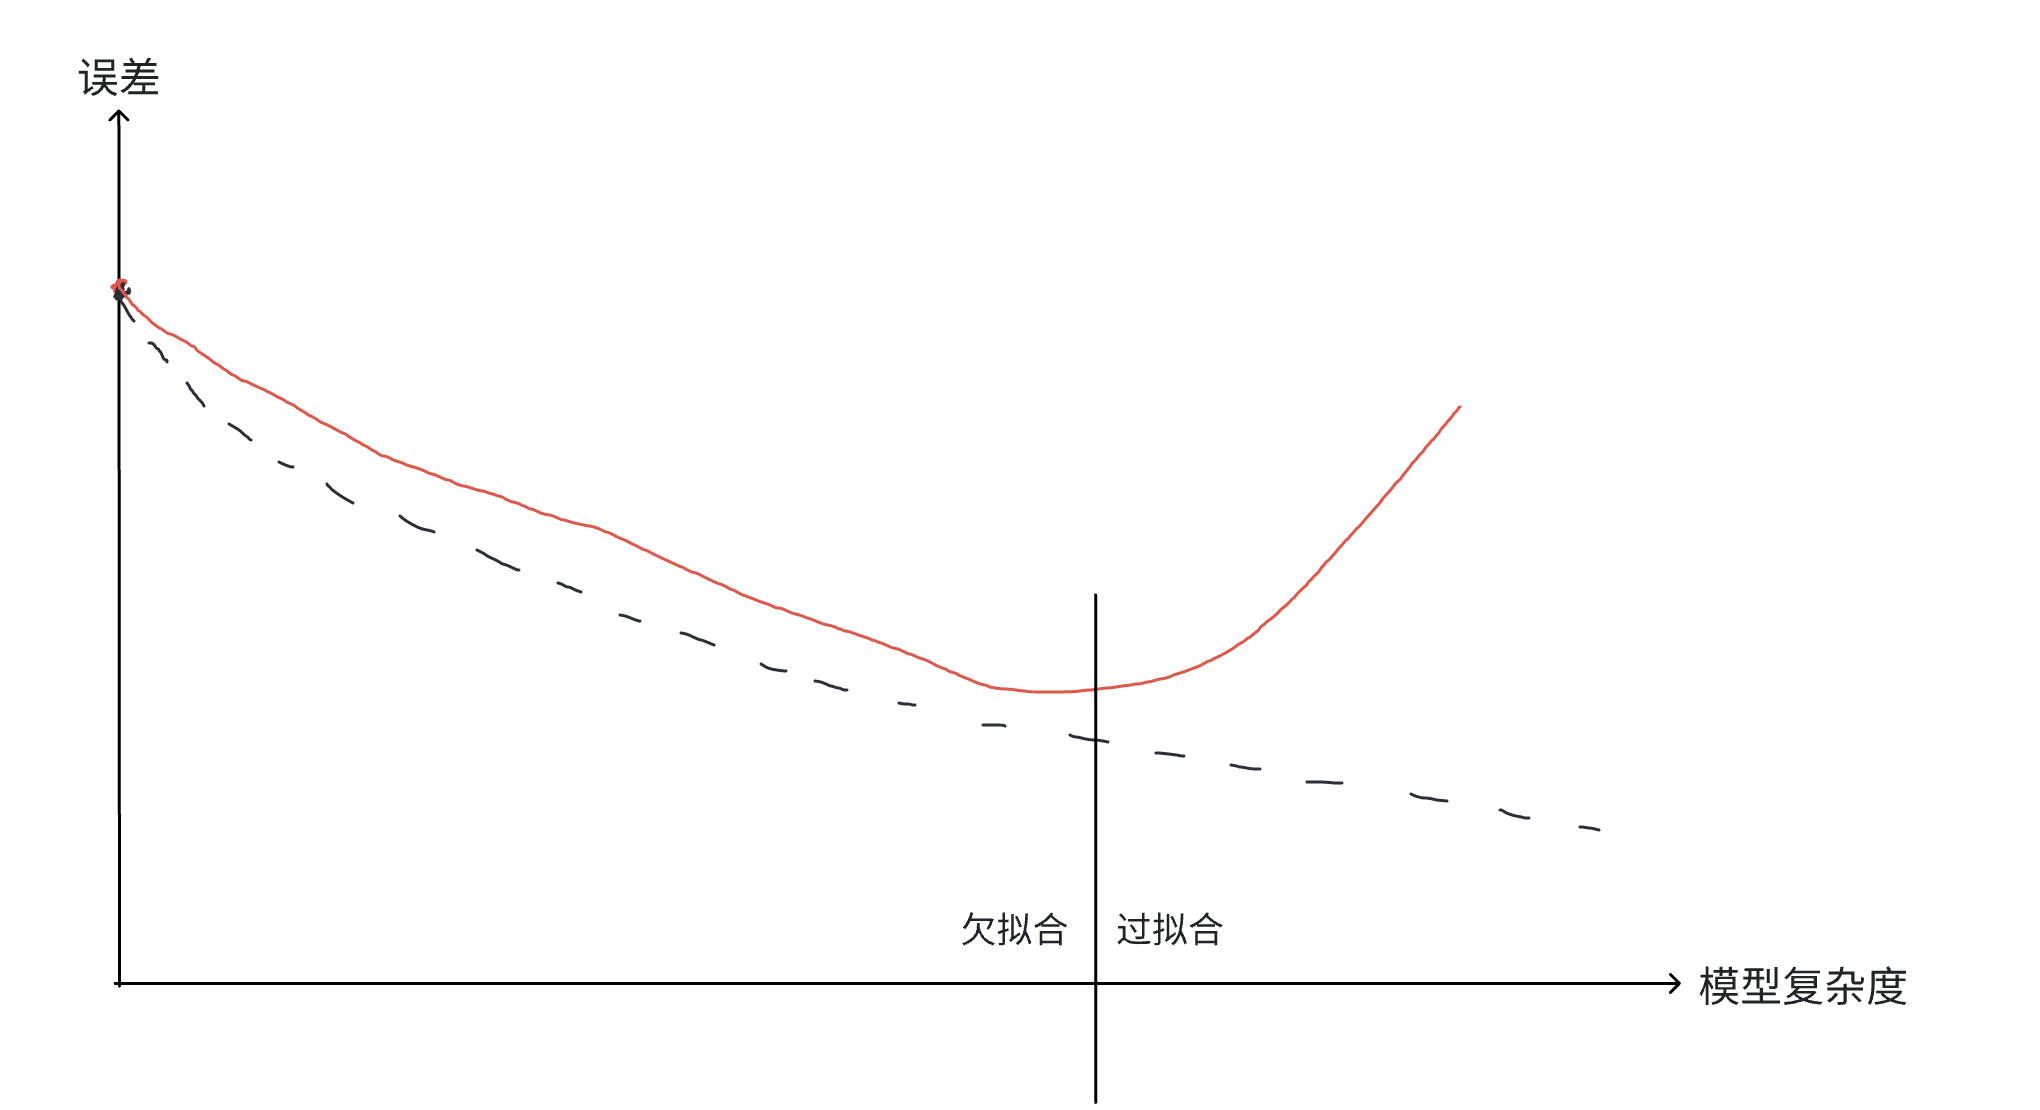  
  
&emsp;&emsp;C.正确；训练数据会在交叉验证开始使用函数前进行打乱(如Random等等)，并且还会进行加密操作，可以有效防止信息泄露。  
&emsp;&emsp;D选项错误；正则化系数是需要手动选择的超参数，需要通过模型的效果人工测试。

## 习题3
假如数据中不存在噪声，过拟合现象是否会消失？

**解答**

&emsp;&emsp;不会；我们不妨一起回忆一下过拟合的定义：过拟合是指在训练数据上表现良好，但泛化能力却很差，即在测试数据上表现很差。所以当训练数据或者模型过于复杂时，都有可能会出现过拟合现象。适当的噪声有时还有助于模型训练————毕竟这个世界上没有完美的事物对吧？

## 习题4
机器学习模型是否可以预测毫无规律的真随机数？试从统计规律的角度解释原因。

**解答**

&emsp;&emsp;当然不可以。结合统计规律和机器学习的基本定义出发，机器学习本质就是在庞大的数据中学习和寻找特定的规律的一种模式。如果数据集中不存在任何规律，那么机器学习模型是无法预测的——————就像你可以精准的预测彩票的开奖号码吗？

## 习题5
除了学习率$\eta$，第 4 章的线性回归模型中还有哪些超参数？数据集$N$大小是超参数吗？

**解答**

&emsp;&emsp;超参数是在训练前由人为设定的参数值，而非模型自己在训练中得到的。超参数需要人为通过交叉验证判断进行设置或者通过启发式算法搜索来找到合适的超参数。第4章的线性回归模型中除了学习率，梯度下降的迭代次数、批量大小以及收敛停止的条件也是超参数。数据集大小通常不是超参数，这是一个外部给定的属性，取决于数据集的大小。

## 习题6
在实践中，如果模型在测试集上的效果不好，如何判断模型是欠拟合还是过拟合？

**解答**

&emsp;&emsp;过拟合是指在训练集上有很好的训练效果，而在测试集上的效果很差；欠拟合是指在训练集与测试集上的效果都不好。我们可以通过具体的指标进行评估，例如准确率达到了夸张的100%，但是F1-score又低的十分可怜，那就说明这个模型是过拟合的；此外，也可以将训练误差与测试误差进行可视化，从而更好的进行判断。

## 习题7
将第4章中的训练集-验证集划分改为交叉验证，选出最好的模型在测试集上测试

**解答**

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np


# 从源文件加载数据，并输出查看数据的各项特征
lines = np.loadtxt('D:/Download/USA_Housing.csv', delimiter=',', dtype='str')
header = lines[0]
lines = lines[1:].astype(float)
print('数据特征：', ', '.join(header[:-1]))
print('数据标签：', header[-1])
print('数据总条数：', len(lines))


# 数据归一化
scaler = StandardScaler()
scaler.fit(lines) # 使用所有数据计算均值和方差
lines_scaled = scaler.transform(lines)

# 划分输入和标签
x, y = lines_scaled[:, :-1], lines_scaled[:, -1]

# 定义线性回归模型
model = LinearRegression()

# 使用交叉验证来选择最佳模型
cv_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -cv_scores  # 取负值得到均方误差

print("各模型的均方误差：", mse_scores)

best_mse = mse_scores.max()  # 选择均方误差最小的模型
best_model_index = mse_scores.argmax()  # 最佳模型对应的索引

print("最佳模型的均方误差：", best_mse)

# 在测试集上评估最佳模型
train_size = len(lines) * 4 // 5  # 使用80%的数据作为训练集
test_size = len(lines) - train_size  # 剩下的数据作为测试集
train, test = lines_scaled[:train_size], lines_scaled[train_size:]
x_train, y_train = train[:, :-1], train[:, -1]
x_test, y_test = test[:, :-1], test[:, -1]

best_model = model.fit(x_train, y_train)  # 在训练集上训练最佳模型
y_pred = best_model.predict(x_test)  # 在测试集上预测
mse_test = mean_squared_error(y_test, y_pred)  # 计算在测试集上的均方误差
print("最佳模型在测试集上的均方误差：", mse_test)

# 输出最佳模型的参数
print("最佳模型的参数：")
print("系数（斜率）：", best_model.coef_)
print("截距：", best_model.intercept_)


数据特征： Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms, Avg. Area Number of Bedrooms, Area Population
数据标签： Price
数据总条数： 5000
各模型的均方误差： [0.08091231 0.08605404 0.07910359 0.0816279  0.08354542]
最佳模型的均方误差： 0.0860540387450174
最佳模型在测试集上的均方误差： 0.08354542259852639
最佳模型的参数：
系数（斜率）： [0.65361133 0.46378742 0.34520317 0.00353179 0.42506886]
截距： 0.002706822695746294
